In [ ]:
# This project explores the shot selection of players/teams in the 2021-2022 NBA regular season.

# Using the NBA api, I extracted almost every shot taken in the 2021-22 regular season in hopes to gain some valuable insights

In [2]:
from nba_api.stats.endpoints import shotchartdetail, leaguedashplayerstats, teamdashboardbyshootingsplits
from nba_api.stats.static import players, teams
import json
import requests
from requests import get
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import string
import time

In [3]:
player_dict = players.get_players()
team_dict = teams.get_teams()

def get_player_id(fullName):
    player_id = [player for player in player_dict if player['full_name'] == fullName][0]['id']
    return player_id

def get_team_id(teamName):
    team_id = [team for team in team_dict if team['full_name'] == teamName][0]['id']
    return team_id # I used the function below more to get team ids as it required less typing

def get_team_id2(abbreviation):
    team_id = [team for team in team_dict if team['abbreviation'] == abbreviation][0]['id']
    return team_id

def get_shotlocations(id_,teamid):
    player_json = shotchartdetail.ShotChartDetail(
        team_id = teamid,
        player_id = id_,
        context_measure_simple = 'FGA',
        season_nullable = '2021-22',
        season_type_all_star = 'Regular Season'
    )
    loaddata = json.loads(player_json.get_json())
    realdata = loaddata['resultSets'][0]
    player_rows = realdata['rowSet']    
    return player_rows

In [4]:
# GETTING THE DATA!

In [9]:
# First, need to find the list of all player records from the 2021-2022 regular season
ps_json = leaguedashplayerstats.LeagueDashPlayerStats(
        per_mode_detailed = 'PerGame',
        season_type_all_star = 'Regular Season',
        measure_type_detailed_defense = 'Base',
        season = '2021-22'    
        )

ps_load = json.loads(ps_json.get_json())
ps_data = ps_load['resultSets'][0]
ps_rows = ps_data['rowSet']
ps_headers = ps_data['headers']

psdf = pd.DataFrame(ps_rows)
psdf.columns = ps_headers
psdf

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,CFID,CFPARAMS
0,203932,Aaron Gordon,Aaron,1610612743,DEN,26.0,75,46,29,0.613,...,203,87,91,36,103,85,40,105,5,"203932,1610612743"
1,1630565,Aaron Henry,Aaron,1610612755,PHI,22.0,6,6,0,1.000,...,560,564,578,506,591,268,40,591,5,"1630565,1610612755"
2,1628988,Aaron Holiday,Aaron,1610612756,PHX,25.0,63,34,29,0.540,...,344,298,322,312,344,268,40,344,5,"1628988,1610612756"
3,1630174,Aaron Nesmith,Aaron,1610612738,BOS,22.0,52,32,20,0.615,...,376,462,442,234,478,268,40,470,5,"1630174,1610612738"
4,1630598,Aaron Wiggins,Aaron,1610612760,OKC,23.0,50,13,37,0.260,...,240,269,240,543,286,268,40,278,5,"1630598,1610612760"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,203897,Zach LaVine,Zach,1610612741,CHI,27.0,67,37,30,0.552,...,256,37,17,288,42,268,40,30,5,"203897,1610612741"
601,1630285,Zavier Simpson,Zavier,1610612760,OKC,25.0,4,1,3,0.250,...,1,147,153,604,64,268,40,90,5,"1630285,1610612760"
602,1630192,Zeke Nnaji,Zeke,1610612743,DEN,21.0,41,24,17,0.585,...,221,266,312,363,355,268,40,345,5,"1630192,1610612743"
603,1630533,Ziaire Williams,Ziaire,1610612763,MEM,20.0,62,41,21,0.661,...,247,383,254,124,340,268,40,322,5,"1630533,1610612763"


In [12]:
# Let's filter by players who have attempted > 0 FGA
psdf = psdf[psdf['FGA'] > 0] 
psdf
# From 605 players to 596
# Note: This data is a snapshot of players and the teams they were on at the end of the season, any players traded during the
# season may have stats not accounted for from their time with teams at the start of the season

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,CFID,CFPARAMS
0,203932,Aaron Gordon,Aaron,1610612743,DEN,26.0,75,46,29,0.613,...,203,87,91,36,103,85,40,105,5,"203932,1610612743"
1,1630565,Aaron Henry,Aaron,1610612755,PHI,22.0,6,6,0,1.000,...,560,564,578,506,591,268,40,591,5,"1630565,1610612755"
2,1628988,Aaron Holiday,Aaron,1610612756,PHX,25.0,63,34,29,0.540,...,344,298,322,312,344,268,40,344,5,"1628988,1610612756"
3,1630174,Aaron Nesmith,Aaron,1610612738,BOS,22.0,52,32,20,0.615,...,376,462,442,234,478,268,40,470,5,"1630174,1610612738"
4,1630598,Aaron Wiggins,Aaron,1610612760,OKC,23.0,50,13,37,0.260,...,240,269,240,543,286,268,40,278,5,"1630598,1610612760"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,203897,Zach LaVine,Zach,1610612741,CHI,27.0,67,37,30,0.552,...,256,37,17,288,42,268,40,30,5,"203897,1610612741"
601,1630285,Zavier Simpson,Zavier,1610612760,OKC,25.0,4,1,3,0.250,...,1,147,153,604,64,268,40,90,5,"1630285,1610612760"
602,1630192,Zeke Nnaji,Zeke,1610612743,DEN,21.0,41,24,17,0.585,...,221,266,312,363,355,268,40,345,5,"1630192,1610612743"
603,1630533,Ziaire Williams,Ziaire,1610612763,MEM,20.0,62,41,21,0.661,...,247,383,254,124,340,268,40,322,5,"1630533,1610612763"


In [5]:
player_json = shotchartdetail.ShotChartDetail(
        team_id = get_team_id2('DEN'),
        player_id = get_player_id('Nikola Jokic'),
        context_measure_simple = 'FGA',
        season_nullable = '2021-22',
        season_type_all_star = 'Regular Season'
    )

get_shotjson = json.loads(player_json.get_json())
realdata = get_shotjson['resultSets'][0]
columns = realdata['headers']
player_rows = realdata['rowSet']    
nikola_jokicdf = pd.DataFrame(player_rows)
nikola_jokicdf.columns = columns
nikola_jokicdf

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100012,7,203999,Nikola Jokic,1610612743,Denver Nuggets,1,11,45,...,Center(C),16-24 ft.,18,43,179,1,1,20211020,PHX,DEN
1,Shot Chart Detail,0022100012,42,203999,Nikola Jokic,1610612743,Denver Nuggets,1,8,8,...,Center(C),Less Than 8 ft.,0,-5,1,1,1,20211020,PHX,DEN
2,Shot Chart Detail,0022100012,67,203999,Nikola Jokic,1610612743,Denver Nuggets,1,5,35,...,Center(C),Less Than 8 ft.,7,-61,38,1,1,20211020,PHX,DEN
3,Shot Chart Detail,0022100012,73,203999,Nikola Jokic,1610612743,Denver Nuggets,1,5,9,...,Center(C),Less Than 8 ft.,6,7,62,1,1,20211020,PHX,DEN
4,Shot Chart Detail,0022100012,77,203999,Nikola Jokic,1610612743,Denver Nuggets,1,4,39,...,Center(C),24+ ft.,25,38,248,1,0,20211020,PHX,DEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,Shot Chart Detail,0022101201,582,203999,Nikola Jokic,1610612743,Denver Nuggets,4,5,51,...,Center(C),Less Than 8 ft.,3,16,33,1,0,20220407,DEN,MEM
1307,Shot Chart Detail,0022101201,586,203999,Nikola Jokic,1610612743,Denver Nuggets,4,5,20,...,Center(C),Less Than 8 ft.,3,-22,23,1,1,20220407,DEN,MEM
1308,Shot Chart Detail,0022101201,600,203999,Nikola Jokic,1610612743,Denver Nuggets,4,4,28,...,Center(C),Less Than 8 ft.,2,9,26,1,0,20220407,DEN,MEM
1309,Shot Chart Detail,0022101201,602,203999,Nikola Jokic,1610612743,Denver Nuggets,4,4,26,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20220407,DEN,MEM


In [33]:
shotrows = []
for id_,abbrev,name in psdf[['PLAYER_ID','TEAM_ABBREVIATION','PLAYER_NAME']].itertuples(index=False):
    print(name) # to see progress of query, not needed
    playerrows = get_shotlocations(id_,abbrev)
    shotrows = shotrows + playerrows
    time.sleep(1) # implemented wait time as I was getting json-related errors during run, unsure if actual solution
    
totaldf = pd.DataFrame(shotrows)
totaldf.columns = columns
totaldf

Aaron Gordon
Aaron Henry
Aaron Holiday
Aaron Nesmith
Aaron Wiggins
Abdel Nader
Admiral Schofield
Ahmad Caver
Al Horford
Alec Burks
Aleem Ford
Aleksej Pokusevski
Alex Caruso
Alex Len
Alfonzo McKinnie
Alize Johnson
Alperen Sengun
Amir Coffey
Andre Drummond
Andre Iguodala
Andrew Wiggins
Anfernee Simons
Anthony Davis
Anthony Edwards
Anthony Gill
Anthony Lamb
Armoni Brooks
Arnoldas Kulboka
Austin Reaves
Austin Rivers
Avery Bradley
Ayo Dosunmu
BJ Johnson
Bam Adebayo
Ben McLemore
Bismack Biyombo
Blake Griffin
Boban Marjanovic
Bobby Portis
Bogdan Bogdanovic
Bojan Bogdanovic
Bol Bol
Bones Hyland
Brad Wanamaker
Bradley Beal
Brandon Boston Jr.
Brandon Clarke
Brandon Goodwin
Brandon Ingram
Brandon Knight
Brandon Williams
Braxton Key
Brodric Thomas
Brook Lopez
Bruce Brown
Bruno Fernando
Bryn Forbes
Buddy Hield
CJ Elleby
CJ McCollum
Cade Cunningham
Caleb Martin
Cam Reddish
Cam Thomas
Cameron Johnson
Cameron McGriff
Cameron Oliver
Cameron Payne
Caris LeVert
Carlik Jones
Carmelo Anthony
Carsen Edwards

Wenyen Gabriel
Wes Iwundu
Wesley Matthews
Will Barton
Willie Cauley-Stein
Willy Hernangomez
Xavier Moon
Xavier Sneed
Xavier Tillman
Yuta Watanabe
Yves Pons
Zach Collins
Zach LaVine
Zavier Simpson
Zeke Nnaji
Ziaire Williams
Zylan Cheatham


In [38]:
# Great, I have my data and will save it to a csv file and can read it so I don't have to run the 
# time-consuming code to extract the data
totaldf.info()
totaldf.to_csv('allshots2.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198743 entries, 0 to 198742
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   GRID_TYPE            198743 non-null  object
 1   GAME_ID              198743 non-null  object
 2   GAME_EVENT_ID        198743 non-null  int64 
 3   PLAYER_ID            198743 non-null  int64 
 4   PLAYER_NAME          198743 non-null  object
 5   TEAM_ID              198743 non-null  int64 
 6   TEAM_NAME            198743 non-null  object
 7   PERIOD               198743 non-null  int64 
 8   MINUTES_REMAINING    198743 non-null  int64 
 9   SECONDS_REMAINING    198743 non-null  int64 
 10  EVENT_TYPE           198743 non-null  object
 11  ACTION_TYPE          198743 non-null  object
 12  SHOT_TYPE            198743 non-null  object
 13  SHOT_ZONE_BASIC      198743 non-null  object
 14  SHOT_ZONE_AREA       198743 non-null  object
 15  SHOT_ZONE_RANGE      198743 non-nu

In [8]:
totaldf = pd.read_csv('allshots2.csv')
totaldf

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,22100012,61,203932,Aaron Gordon,1610612743,Denver Nuggets,1,6,24,...,Center(C),Less Than 8 ft.,1,-15,10,1,1,20211020,PHX,DEN
1,Shot Chart Detail,22100012,82,203932,Aaron Gordon,1610612743,Denver Nuggets,1,4,14,...,Right Side(R),24+ ft.,23,233,19,1,1,20211020,PHX,DEN
2,Shot Chart Detail,22100012,97,203932,Aaron Gordon,1610612743,Denver Nuggets,1,3,42,...,Center(C),Less Than 8 ft.,3,-23,31,1,0,20211020,PHX,DEN
3,Shot Chart Detail,22100012,105,203932,Aaron Gordon,1610612743,Denver Nuggets,1,3,3,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20211020,PHX,DEN
4,Shot Chart Detail,22100012,319,203932,Aaron Gordon,1610612743,Denver Nuggets,3,10,5,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20211020,PHX,DEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198738,Shot Chart Detail,22101223,455,1630533,Ziaire Williams,1610612763,Memphis Grizzlies,3,3,53,...,Right Side Center(RC),24+ ft.,25,200,155,1,1,20220410,MEM,BOS
198739,Shot Chart Detail,22101223,457,1630533,Ziaire Williams,1610612763,Memphis Grizzlies,3,3,31,...,Right Side Center(RC),24+ ft.,25,114,232,1,0,20220410,MEM,BOS
198740,Shot Chart Detail,22100624,399,1629597,Zylan Cheatham,1610612762,Utah Jazz,3,4,20,...,Right Side Center(RC),24+ ft.,25,199,164,1,0,20220112,UTA,CLE
198741,Shot Chart Detail,22100624,407,1629597,Zylan Cheatham,1610612762,Utah Jazz,3,3,27,...,Left Side(L),24+ ft.,22,-229,1,1,0,20220112,UTA,CLE


In [ ]:
# Now I can visualize and explore using matplotlib
# After exporting to CSV, I want to store in a SQL database and normalize the dataset a bit
# With the data in SQL server, I can use Power BI to visualize and explore some of the data
# I was interested in seeing the shot selection of teams as teams across the league have moved towards taking a lot more
# 3 points, with the realization of higher offensive efficiencies of such shots, and the not so effective long 2/midrange shots
# The rise of superstar Steph Curry and the Golden State Warriors have notably demonstrated how potent offense could be with
# effective 3-point shooters, and the Houston Rockets during the Daryl Morey-era have employed a healthy diet of mostly 3-point 
# shooting and shots at the rim since. 

In [39]:
# Creating list of teams (in abbreviated form)
team_list = [team['abbreviation'] for team in team_dict]
team_list = sorted(team_list)

['ATL',
 'BKN',
 'BOS',
 'CHA',
 'CHI',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHX',
 'POR',
 'SAC',
 'SAS',
 'TOR',
 'UTA',
 'WAS']

In [46]:
# Creating list of teams (in abbreviated form)
team_list = [team['abbreviation'] for team in team_dict]
team_list = sorted(team_list)

# Calculating team 3PA + Rim attempts (Restricted area FGA)
rows = []
for team in team_list:
  ss_json = teamdashboardbyshootingsplits.TeamDashboardByShootingSplits(
          team_id = get_team_id2(team),
          measure_type_detailed_defense = 'Base',
          season = '2021-22',
          per_mode_detailed = 'PerGame'
          )

  ss_load = json.loads(ss_json.get_json())
  ss_data = ss_load['resultSets'][3]
  ss_rows = ss_data['rowSet']
  ssheaders = ss_data['headers']

  ssdf = pd.DataFrame(ss_rows)
  ssdf.columns = ssheaders
  a = ['Restricted Area',
   'Left Corner 3',
   'Right Corner 3',
   'Above the Break 3'
  ]
  lay3rate = ssdf[ssdf.GROUP_VALUE.isin(a)].FGA.sum()/ssdf.FGA.sum()
  threes_rate = ssdf[ssdf.GROUP_VALUE.isin(a[1:4])].FGA.sum()/ssdf.FGA.sum()
  data = [team, lay3rate, threes_rate]
  rows.append(data)
  print(f'{team}: {lay3rate}, {threes_rate}')
  time.sleep(1)

ATL: 0.6681397597016987, 0.3873774340560696
BKN: 0.638946352227279, 0.3574679354571783
BOS: 0.6980605553230083, 0.4226315055113716
CHA: 0.7536347872482326, 0.4140322795784981
CHI: 0.6194752350217483, 0.32776764417005755
CLE: 0.7034582132564842, 0.38530259365994235
DAL: 0.6806072758521914, 0.43554855342308796
DEN: 0.7122474925836982, 0.41262890238734284
DET: 0.7026283198018439, 0.38791798541351313
GSW: 0.7180753492309863, 0.4509665584873712
HOU: 0.8031907383876888, 0.44458562755894393
IND: 0.7125919869174162, 0.39165985282093213
LAC: 0.6425383542538354, 0.3885634588563459
LAL: 0.7279846132710537, 0.38686632779227914
MEM: 0.6509884998061765, 0.34371365809536114
MIA: 0.685504745470233, 0.41832039114178887
MIL: 0.7018142136134224, 0.42777247305960986
MIN: 0.7554304102976669, 0.4490480021453473
NOP: 0.6688851913477537, 0.3607875762617859
NYK: 0.7162257745084171, 0.42622718913566277
OKC: 0.6900136798905608, 0.4176470588235294
ORL: 0.7011049723756906, 0.41395027624309394
PHI: 0.65320253894979

In [47]:
teamshotdf = pd.DataFrame(rows)
teamshotdf.columns = ['Team','3PA + Restricted FGA Rate', '3PA Rate']
teamshotdf.to_csv('3PA_Restricted_rate.csv',index=False)
teamshotdf.sort_values('3PA + Restricted FGA Rate', ascending=False)

,Team,3PA + Restricted FGA Rate,3PA Rate
10,HOU,0.803191,0.444586
17,MIN,0.755430,0.449048
3,CHA,0.753635,0.414032
28,UTA,0.731428,0.465261
13,LAL,0.727985,0.386866
24,POR,0.726064,0.419933
9,GSW,0.718075,0.450967
19,NYK,0.716226,0.426227
11,IND,0.712592,0.391660
7,DEN,0.712247,0.412629


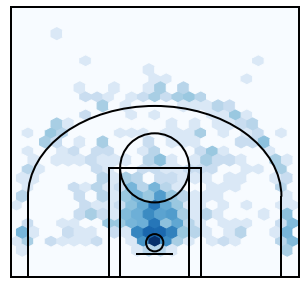

In [12]:
# Show some player viz with matplotlib and show some team viz with power bi
# Using Naveen's tutorial on how to create player shot charts
# https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d
# Let's create a shot chart for the 2021-2022 Rookie of the Year, Scottie Barnes

scottiedf = totaldf.loc[totaldf.PLAYER_NAME == 'Scottie Barnes']

def create_court(ax, color):
        
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    ax.set_xticks([])
    ax.set_yticks([])
    colors = {'2PT Field Goal':'tab:red', '3PT Field Goal':'tab:green'}
    mpl.rcParams['font.family'] = 'Avenir'
    mpl.rcParams['font.size'] = 18
    mpl.rcParams['axes.linewidth'] = 2
    ax.hexbin(scottiedf['LOC_X'],scottiedf['LOC_Y']+60, gridsize=(30,30), extent=(-300, 300, 0, 940), cmap='Blues',bins ='log')
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

plt.show()